#### TP Semanal 7

### Ejercicio 1:
Para el siguiente cuadripolo se pide calcular los parámetros Z.

<img src='image67.png'>

### Circuito equivalente
<img src='image66.png'>

### Resolveré por Análisis Nodal Modificado

In [94]:
from IPython.display import IFrame
IFrame("./tp-semanal-7.pdf", width="100%", height="600")

In [84]:
import sympy as sp

# Definimos las variables simbólicas
G1, G2, G3, n, I1, I2 = sp.symbols('G1 G2 G3 n I1 I2')

# Creamos la matriz simbólica 2x2
matriz_A = sp.Matrix([[G1 + G2, -G2, 0, 0, -1/n], 
                      [-G2, G2 + G3, 0, 0, -1], 
                      [0, 0, 0, -1, 1], 
                      [-1/n, 0, -1, 0, 0], 
                      [0, -1, +1, 0, 0]])

# matriz_A = matriz_A.subs({n: 1, G1: 1, G2: .5, G3: 1/3})
matriz_A = matriz_A.subs({n: 1})

matriz_C = sp.Matrix([I1,I2,0,0,0])

# Mostramos la matriz original y su inversa
print ("matriz:\n")
sp.pprint(matriz_A)

# Calculamos la inversa de la matriz
matriz_inversa = matriz_A.inv()

matriz_B = matriz_inversa * matriz_C

print ("\nmatriz Z:\n")
matriz_Z = sp.Matrix([[matriz_B[0].subs({I2: 0})/I1, matriz_B[0].subs({I1:0})/I2], 
           [matriz_B[1].subs({I2:0})/I1, matriz_B[1].subs({I1: 0})/I2]])

sp.pprint(matriz_Z)


matriz:

⎡G₁ + G₂    -G₂    0   0   -1⎤
⎢                            ⎥
⎢  -G₂    G₂ + G₃  0   0   -1⎥
⎢                            ⎥
⎢   0        0     0   -1  1 ⎥
⎢                            ⎥
⎢  -1        0     -1  0   0 ⎥
⎢                            ⎥
⎣   0       -1     1   0   0 ⎦

matriz Z:

⎡      1              -1       ⎤
⎢──────────────  ──────────────⎥
⎢G₁ + 4⋅G₂ + G₃  G₁ + 4⋅G₂ + G₃⎥
⎢                              ⎥
⎢     -1               1       ⎥
⎢──────────────  ──────────────⎥
⎣G₁ + 4⋅G₂ + G₃  G₁ + 4⋅G₂ + G₃⎦


### Ejercicio 2:

Dado el siguiente circuito:

<img src='image68.png'>

👉 Obtener la transferencia de tensión $\frac{V_o}{V_i}$ por método de cuadripolos (se sugiere referirse a alguno de los métodos de interconexión ya vistos). Ayuda: si $C_2=\frac{4}{3}$ (se utilizó 1.333 para la simulación), los polos de la transferencia están ubicados sobre una circunferencia de radio unitario.

👉 Construya la matriz de admitancia indefinida (MAI) del circuito.

👉 Compute la misma transferencia de tensiónfracción V subíndice o entre V subíndice i mediante MAI.

👉 Verifique la transferencia mediante Análisis Nodal Modificado (MNA).


<IPython.core.display.Math object>

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

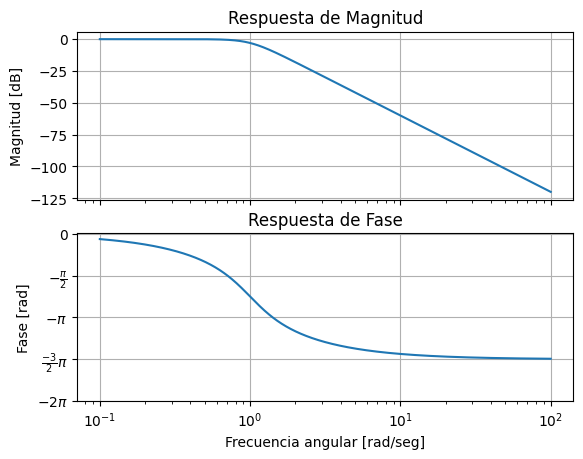

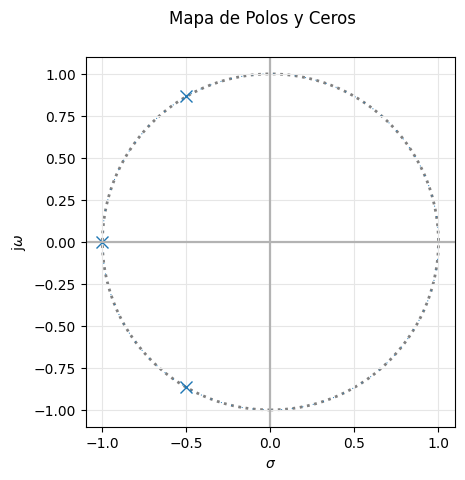

In [93]:
import sympy as sp
from scipy import signal as sig
import numpy as np
from matplotlib import pyplot as plt
from pytc2.sistemas_lineales import bodePlot, pzmap, pretty_print_lti

# Definimos las variables simbólicas
S = sp.symbols('S')

matriz_A = sp.Matrix([[1+2*S**2, 1.5*S],[4/3*S, 1]])
matriz_B = sp.Matrix([[1+.5*S, .5*S],[1, 1]])

matriz_T = matriz_A * matriz_B

transferencia = 1/matriz_T[0,0]
transferencia = sp.expand(transferencia)
# sp.pprint(transferencia)
cociente, residuo = transferencia.as_numer_denom()
coef_cociente = sp.Poly(cociente, S).all_coeffs()
coef_residuo = sp.Poly(residuo, S).all_coeffs()
# # Función para igualar el tamaño
# def igualar_tamano(array, max_len):
#     return np.concatenate([np.zeros(max_len - len(array)),array])

# # Igualar los tamaños
# coef_cociente = igualar_tamano(coef_cociente, len(coef_residuo))

num = np.array(coef_cociente, dtype=float)
den = np.array(coef_residuo, dtype=float)

display(Math("T(s) = " + pretty_print_lti(num, den, displaystr=False)))
H1 = sig.TransferFunction(num, den)

fig1, axs = bodePlot(H1)  # Obtener la figura y las subtramas

pzmap(H1)

### Verifico por Análisis Nodal Modificado

In [86]:
import sympy as sp

# Definimos las variables simbólicas
L1, L3, C2, S, G, E = sp.symbols('L1 L3 C2 S G E')

# Creamos la matriz simbólica 2x2
matriz_A = sp.Matrix([[S*C2, 0, 0, -1, 1, 0], 
                      [0, G, 0, 0, -1, 0], 
                      [0, 0, 0, 1, 0, 1],
                      [-1, 0, 1, -S*L1, 0, 0], 
                      [1, -1, 0, 0, -S*L3, 0], 
                      [0, 0, 1, 0, 0, 0]])


matriz_C = sp.Matrix([0, 0, 0, 0, 0, E])

matriz_B = matriz_A.inv() * matriz_C

print ("\nmatriz_A:\n")
sp.pprint(matriz_A)

print ("\ntransferencia:\n")
sp.pprint((matriz_B[1]/E).subs({L1: 1.5, L3: .5, C2: 4/3, G:1}))


matriz_A:

⎡C₂⋅S  0   0   -1      1    0⎤
⎢                            ⎥
⎢ 0    G   0    0     -1    0⎥
⎢                            ⎥
⎢ 0    0   0    1      0    1⎥
⎢                            ⎥
⎢ -1   0   1  -L₁⋅S    0    0⎥
⎢                            ⎥
⎢ 1    -1  0    0    -L₃⋅S  0⎥
⎢                            ⎥
⎣ 0    0   1    0      0    0⎦

transferencia:

             1             
───────────────────────────
     3        2            
1.0⋅S  + 2.0⋅S  + 2.0⋅S + 1
